# TERM DEPOSIT 

# Context

A **term deposit** is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.
ACME is a small startup focusing mainly on providing machine learning solutions in the European banking market. The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.


# Content
* age : age of customer (numeric)
* job : type of job (categorical)
* marital : marital status (categorical)
* education (categorical)
* default: has credit in default? (binary)
* balance: average yearly balance, in euros (numeric)
* housing: has a housing loan? (binary)
* loan: has personal loan? (binary)
* contact: contact communication type (categorical)
* day: last contact day of the month (numeric)
* month: last contact month of year (categorical)
* duration: last contact duration, in seconds (numeric)
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* y: has the client subscribed to a term deposit? (binary)

***Goal***

We will predict whether the customer will subscribe (yes / no) to the term deposit (variable y).

- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Library</a>
    - <a href='#1.2'>1.2 Data overview</a>
- <a href='#2'>2. Data Manipulation, Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1. Variable Summary</a>
    - <a href='#2.2'>2.2. Varibles distribution in customer attrition</a>
    - <a href='#2.3'>2.3. Changes and Groups</a>
- <a href='#3'>3. Data preprocessing, Feature Selection </a>
    - <a href='#3.1'>3.1. Visualising data with updated features</a>
    - <a href='#3.2'>3.2. Correlation Matrix</a>
- <a href='#4'>4. Model Building</a>
    - <a href='#4.1'>4.1. Feature Scaling</a>
    - <a href='#4.2'>4.2. Baseline Model,Model Visualization</a>
    - <a href='#4.3'>4.3. Confusion matrices for models</a>
    - <a href='#4.4'>4.4. Classification reports for models, Compare model metrics</a>
- <a href='#5'>5. Model Performances</a>
    - <a href='#5.1'>5.1. Model performance metrics,Tuning parameters</a>
    - <a href='#5.2'>5.2. ROC - Curves  for model,Randomized Search-Cross Validation</a>
- <a href='#6'>6. Segmentation (Bonus)</a>
- <a href='#7'>7. Summary and Conclusion</a>



# <a id='1'>1.Data</a>

Let's import the libraries that we will use in data analysis.

## <a id='1'>1.1 Library</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
import scipy.stats as stats
from scipy.stats import chi2_contingency
from feature_engine.outlier_removers import Winsorizer
from feature_engine.discretisers import EqualWidthDiscretiser
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,mean_squared_error, roc_curve,confusion_matrix,accuracy_score,classification_report 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

## <a id='1'>1.2 Data Overview</a>

In [2]:
pd.options.display.max_columns = None

In [3]:
csv_file = "term-deposit-marketing-2020.csv"


def get_data_from_csv(file_name):
    data = pd.read_csv(file_name)
    return data.copy()

In [5]:
df = get_data_from_csv(csv_file)

Check the head of the data

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


Check the overview, info(), describe() methods on the data.

In [7]:
def print_summary_data(data):
    print("Rows         :", data.shape[0])
    print("-" * 30)
    print("Columns      :", data.shape[1])
    print("-" * 30)
    print("Features :\n ", data.columns.tolist())
    print("-" * 30)
    print("Missing Values :   ", data.isnull().sum().values.sum())
    print("-" * 30)
    print("Unique Values:     \n", data.nunique())


print_summary_data(df)

Rows         : 40000
------------------------------
Columns      : 14
------------------------------
Features :
  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y']
------------------------------
Missing Values :    0
------------------------------
Unique Values:     
 age            70
job            12
marital         3
education       4
default         2
balance      6849
housing         2
loan            2
contact         3
day            31
month          11
duration     1535
campaign       48
y               2
dtype: int64


There is no missing value in our data.

In [8]:
def get_descriptive_info(data):
    print("Info      :\n", data.info())
    print("-" * 30)
    print("Describe    :\n", data.describe())
    print("-" * 30)
    print("Uniques     :\n")
    for i in data.columns:
        if data[i].dtype == "O":
            print(data[i].unique())


get_descriptive_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB
Info      :
 None
------------------------------
Describe    :
                 age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000

# <a id='2'>2.Data Manipulation, Exploratory Data Analysis</a>

## <a id='2'>2.1 Variable Summary</a>

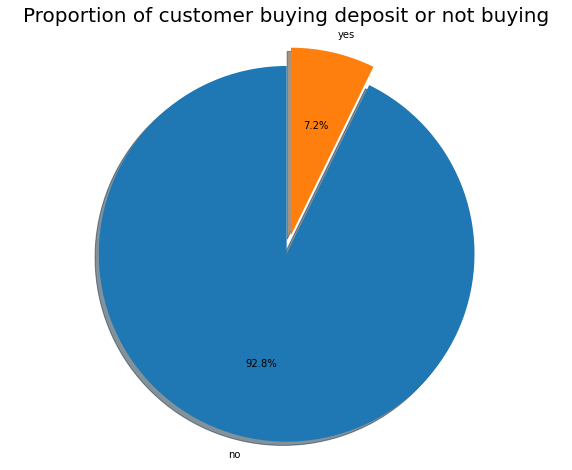

In [9]:
def draw_target_value_pie_chart(data, label_1, label_2, variable, title):
    labels = label_1, label_2
    sizes = [data[variable][data[variable] == label_1].count(), data[variable][data[variable] == label_2].count()]
    explode = (0, 0.1)
    fig1, ax1 = plt.subplots(figsize=(10, 8))
    ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%",
            shadow=True, startangle=90)
    ax1.axis("equal")
    plt.title(title, size=20)
    plt.show()


draw_target_value_pie_chart(df,"no", "yes", "y", "Proportion of customer buying deposit or not buying")

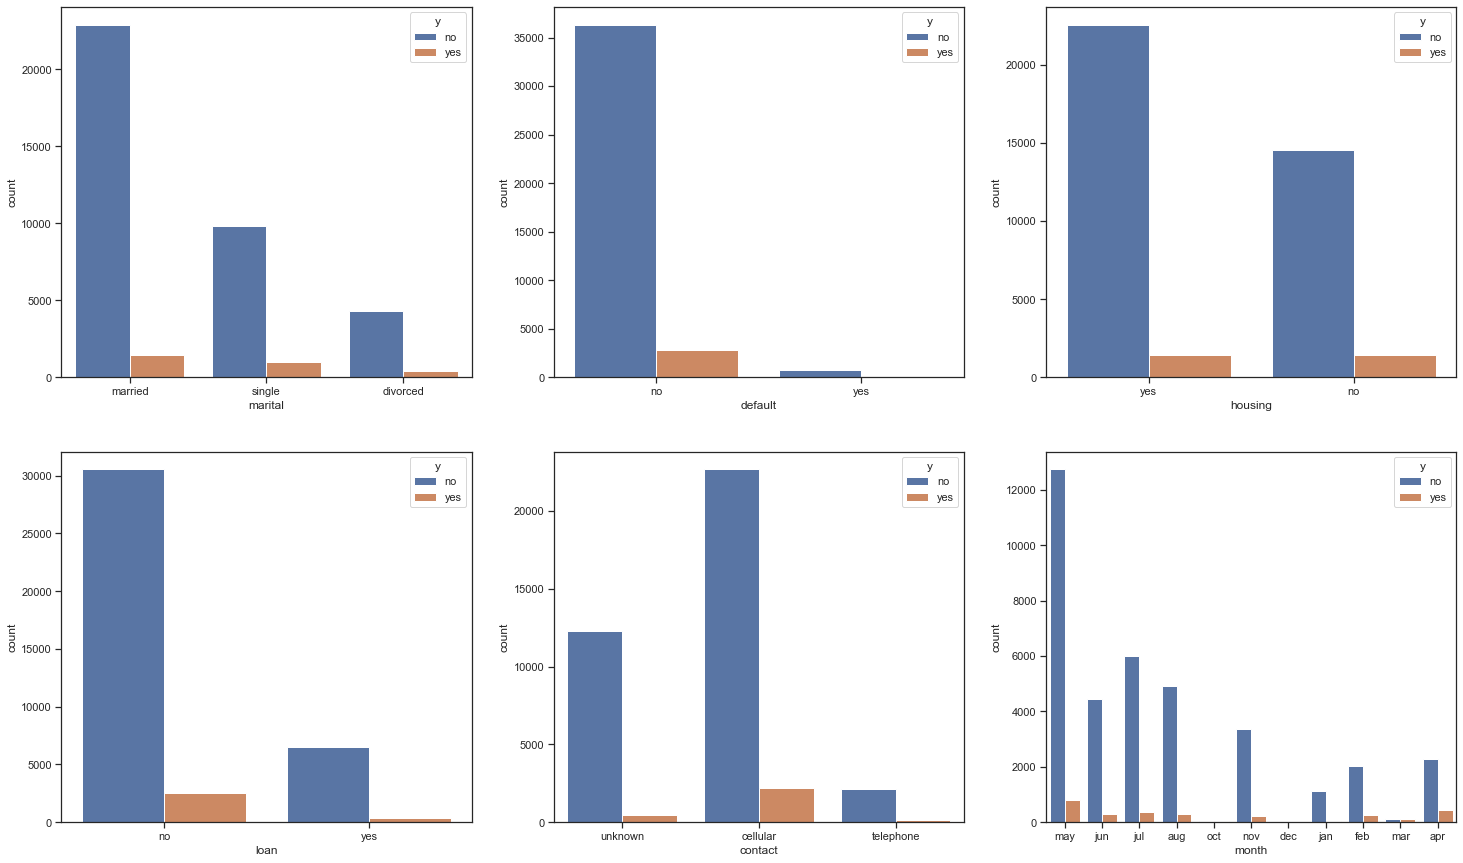

In [10]:
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 2,ncols = 3,figsize = (25,15))
sns.countplot(x = "marital", data = df, hue = 'y',ax=axes[0][0])
sns.countplot(x = "default", data = df, hue = 'y',ax=axes[0][1])
sns.countplot(x = "housing", data = df, hue = 'y',ax=axes[0][2])
sns.countplot(x = "loan", data = df, hue = 'y',ax=axes[1][0])
sns.countplot(x = "contact", data = df, hue = 'y',ax=axes[1][1])
sns.countplot(x = "month", data = df,hue = 'y', ax=axes[1][2])
plt.show(fig)

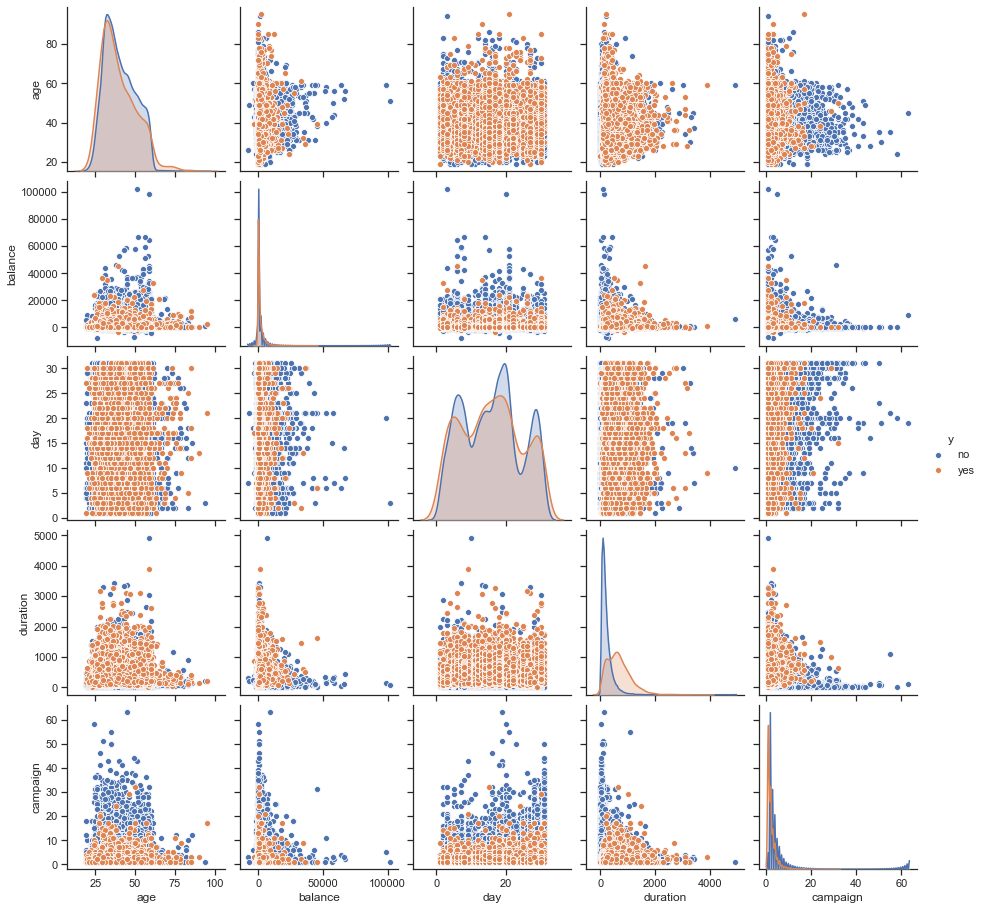

In [11]:
sns.pairplot(data = df, hue = "y")

Let's use chi-square test to understand relationship between categorical variables and target variable. P values for features education, job and contact are very low. So we can reject our Null Hypothesis which is these features are independent and have no relationship with target variable

In [12]:
def get_chi_square(data, target, variable_list):
    for var in variable_list:
        csq = chi2_contingency(pd.crosstab(data[target], data[var]))
        print("P-value: ", csq[1])

get_chi_square(df,"y", ["education", "job","contact"])

P-value:  8.06191084544081e-21
P-value:  1.6761348063575326e-26
P-value:  7.242046790893985e-71


## <a id='2'>2.2 Varibles distribution in customer attrition</a>

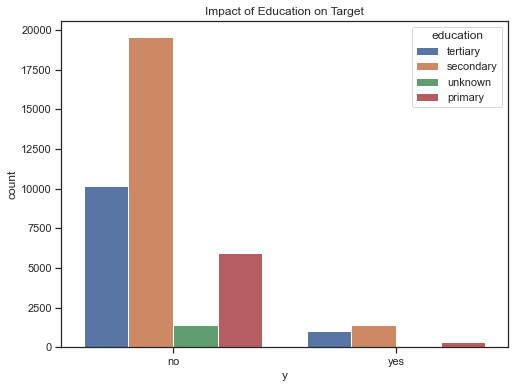

In [13]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='y', data=df, hue='education')
plt.title("Impact of Education on Target")
plt.show()

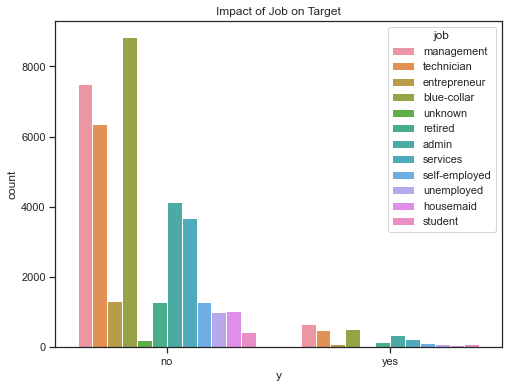

In [14]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='y', data=df, hue='job')
plt.title("Impact of Job on Target")
plt.show()

y        no   yes
type             
1        28     6
2      5212   593
3     15017  1129
4      9829   634
5      6875   443
6       101    54
7        32    30
8         9     6
9         1     1


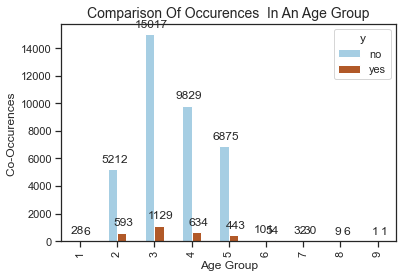

In [15]:
def group_age_and_draw_chart(group_name, target):
    bins = np.arange(10, 100, 10)

    df[group_name] = np.digitize(df.age, bins, right=True)

    counts = df.groupby([group_name, target]).age.count().unstack()
    print(counts)

    ax = counts.plot(kind="bar", stacked=False, colormap="Paired")

    for p in ax.patches:
        ax.annotate(
            np.round(p.get_height(), decimals=0).astype(np.int64),
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha="center",
            va="center",
            xytext=(2, 10),
            textcoords="offset points"
        )

    plt.xlabel("Age Group")
    plt.ylabel("Co-Occurences ")
    plt.title("Comparison Of Occurences  In An Age Group", fontsize=14)
    plt.show()

group_age_and_draw_chart("type", "y")

## <a id='2'>2.3 Changes and Groups</a>

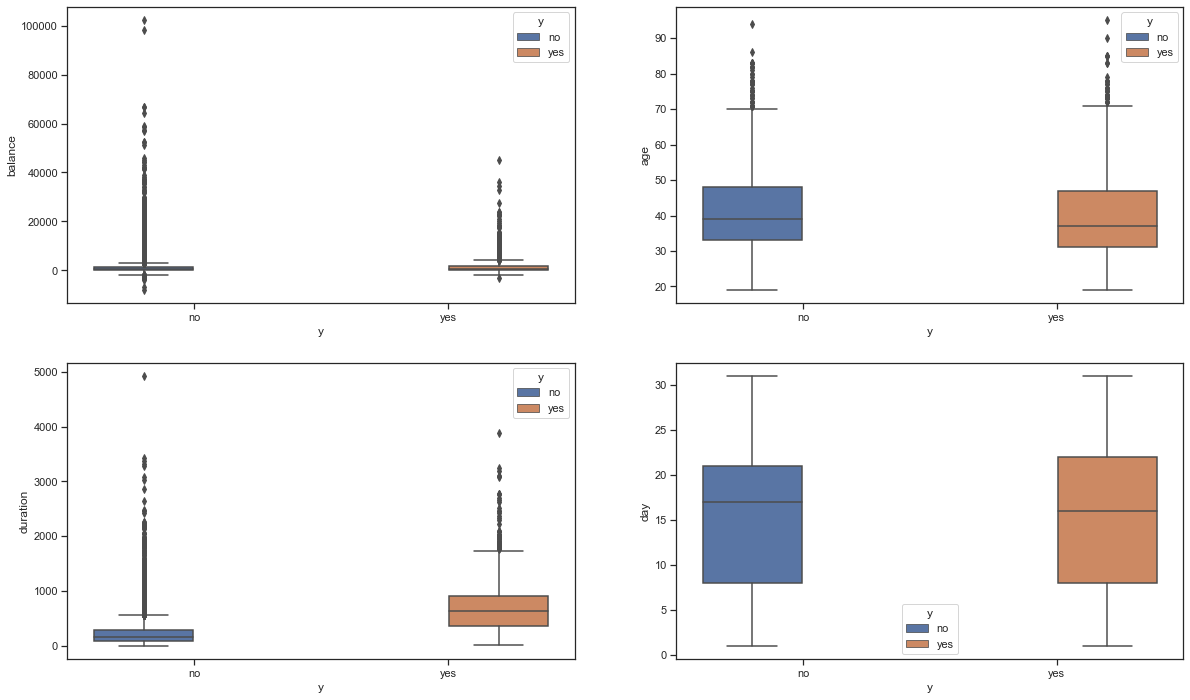

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='balance',x = 'y', hue = 'y',data = df, ax=axarr[0][0])
sns.boxplot(y='age',x = 'y', hue = 'y',data = df , ax=axarr[0][1])
sns.boxplot(y='duration',x = 'y', hue = 'y',data = df, ax=axarr[1][0])
sns.boxplot(y='day',x = 'y', hue = 'y',data = df, ax=axarr[1][1])

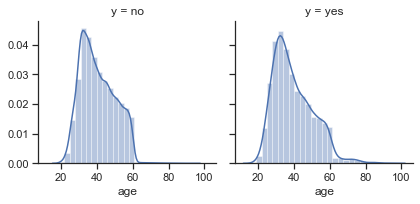

In [17]:
g= sns.FacetGrid(df, col = "y")
g.map(sns.distplot, "age", bins = 25)
plt.show()

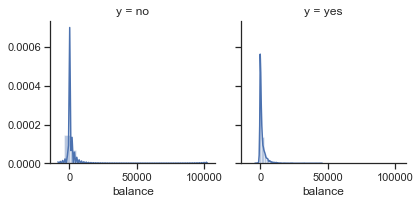

In [18]:
g= sns.FacetGrid(df, col = "y")
g.map(sns.distplot, "balance", bins = 25)
plt.show()

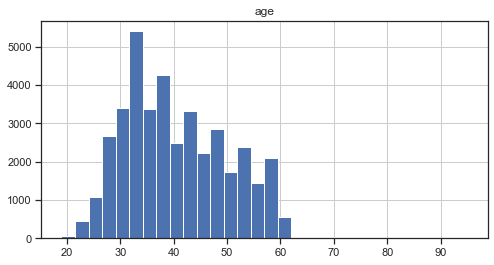

In [19]:
df[["age"]].hist(bins = 30,figsize = (8,4))
plt.show()

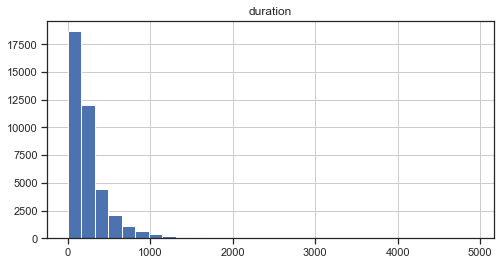

In [20]:
df[["duration"]].hist(bins = 30,figsize = (8,4))
plt.show()

In [21]:
df['y'] = np.where(df['y'] == 'yes',1,0)

Mode value is assigned to values which are 'unknown' for **Education** variable. Since there was no additional explanation in the data, the education level was assumed to be composed of 3 parts.
The values 'unknown' for the **Job** variable are assigned 'missing'. It is assumed that there are also occupations performed outside of the occupations mentioned in the data. 
The 'other' variable has been assigned for the 'unknown' value in the **Contact** variable.

In [22]:
df["education"] = np.where(df["education"] == "unknown",df["education"].mode(),df["education"])
df["job"] = np.where(df["job"] == "unknown","missing",df["job"])
df["contact"] = np.where(df["contact"] == "unknown","other",df["contact"])

In order to avoid deviations in the success results of the model and to interpret the results correctly, we determine the outliers with the help of Histogram, QQ-Plot and Boxplot graphics with the deeply_plots function.
We use the Winsorizer function in the feature_engine library to remove outliers from the dataset. With this function based on IQR, we update our variables.

balance


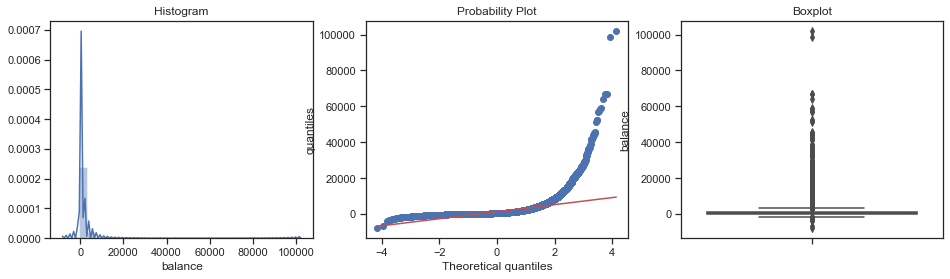

duration


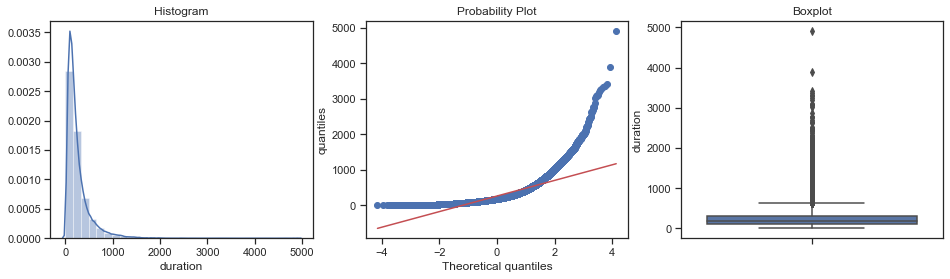

In [23]:
def deeply_plots(df, variable_list):
    for variable in variable_list:
        print(variable)
        plt.figure(figsize=(16, 4))
        # histogram
        plt.subplot(1, 3, 1)
        sns.distplot(df[variable], bins=30)
        plt.title("Histogram")
        # QQ-plot
        plt.subplot(1, 3, 2)
        stats.probplot(df[variable], dist="norm", plot=plt)
        plt.ylabel("quantiles")
        # boxplot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=df[variable])
        plt.title("Boxplot")
        plt.show()


deeply_plots(df, ["balance", "duration"])

In [24]:
wind = Winsorizer(distribution = 'skewed',
                  tail = 'both',
                  fold = 1.5,
                  variables=['balance','duration'])

In [25]:
wind.fit(df)
df = wind.transform(df)

balance


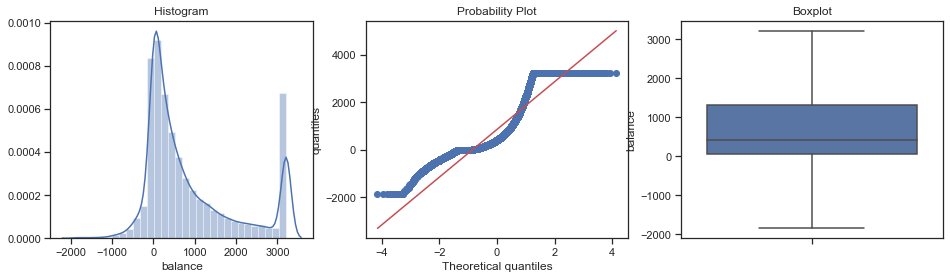

duration


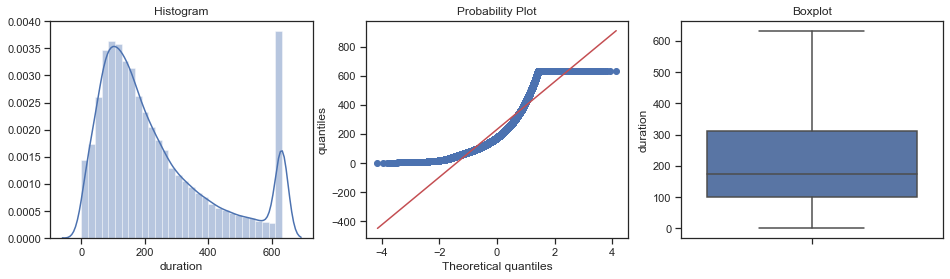

In [26]:
deeply_plots(df, ["balance", "duration"])

Before creating the model, we create dummy variables for our categorical variables using pandas library.

In [27]:
dummylist = []

dummy_variables = ["job","marital","education","default","housing","loan","contact","month"]
for var in dummy_variables:  
    dummylist.append(pd.get_dummies(df[var],prefix = var,prefix_sep="_",drop_first=True))
    dummies_collected = pd.concat(dummylist,axis = 1)

In [28]:
df.drop(dummy_variables,axis = 1,inplace = True)
df = pd.concat([df,dummies_collected],axis = 1)

In [29]:
df.drop("type", axis=1, inplace=True)
df.shape

(40000, 36)

# <a id='3'>3.Data Preprocessing, Feature Selection</a>

## <a id='3'>3.1 Visualising data with updated features</a>

In [30]:
X = df.drop('y',axis = 1)
y = df['y']

We divide the dataset into 2 as train and test.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Using the EqualWidthDiscretiser function as another method to get rid of outlivers, we scale our variables in equal intervals for **age**, **day** and **campain**.

In [32]:
countlabel = ["age","day","campaign"]
disc = EqualWidthDiscretiser(bins = 10, variables = countlabel)

In [33]:
disc.fit(X_train)
disc.fit(X_test)

EqualWidthDiscretiser(variables=['age', 'day', 'campaign'])

In [34]:
disc.binner_dict_

{'age': [-inf,
  26.6,
  34.2,
  41.8,
  49.4,
  57.0,
  64.6,
  72.19999999999999,
  79.8,
  87.39999999999999,
  inf],
 'day': [-inf, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, inf],
 'campaign': [-inf,
  4.3,
  7.6,
  10.899999999999999,
  14.2,
  17.5,
  20.799999999999997,
  24.099999999999998,
  27.4,
  30.7,
  inf]}

In [35]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

In [36]:
def bingraph(train,test,variable):
    t1 = train.groupby([variable])[variable].count()/len(train)
    t2 = test.groupby([variable])[variable].count()/len(test)

    tmp = pd.concat([t1,t2],axis = 1)
    tmp.columns = ['train','test']
    tmp.plot.bar()
    plt.xticks(rotation = 0)
    plt.ylabel('number of observations per bin')

We observe how the bins we created are distributed in the train and test data.

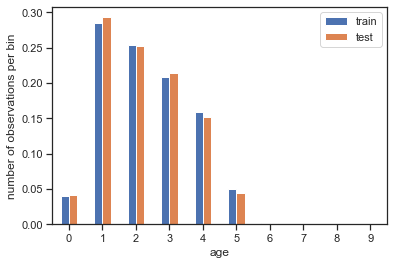

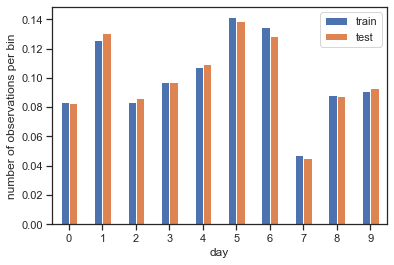

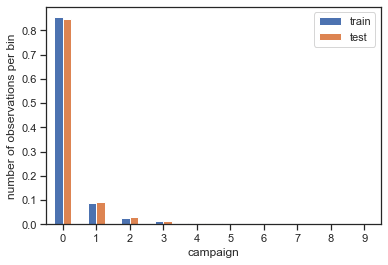

In [37]:
bingraph(X_train,X_test,'age'),
bingraph(X_train,X_test,'day'),
bingraph(X_train,X_test,'campaign')

In [38]:
dummylist_train = []
dummylist_test = []
countlabel2 = ["age","day","campaign"]

for lab in countlabel2:  
    dummylist_train.append(pd.get_dummies(X_train[lab],prefix = lab,prefix_sep="_",drop_first=True))
    dummies_collected_train = pd.concat(dummylist_train,axis = 1)
    
X_train.drop(countlabel2,axis = 1,inplace = True)
X_train = pd.concat([X_train,dummies_collected_train],axis = 1)

In [39]:
for lab in countlabel2:  
    dummylist_test.append(pd.get_dummies(X_test[lab],prefix = lab,prefix_sep="_",drop_first=True))
    dummies_collected_test = pd.concat(dummylist_test,axis = 1)
    
X_test.drop(countlabel2,axis = 1,inplace = True)
X_test = pd.concat([X_test,dummies_collected_test],axis = 1)

In [40]:
X_train.shape,X_test.shape

((32000, 59), (8000, 59))

## <a id='3'>3.2 Correlation Matrix</a>

In [41]:
class FeatureSelector:

    def __init__(self, X_train):
        self.X_train = X_train

    def get_correlation_matrix(self):
        corr_matrix = self.X_train.corr()
        fig, ax = plt.subplots(figsize=(20, 15))
        ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)

    @staticmethod
    def correlation(dataset, threshold):
        col_corr = set()
        corr_matrix = dataset.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
                    
        return col_corr

    def get_corr_features_len(self):
        corr_features = self.correlation(self.X_train, 0.8)
        return len(set(corr_features))

    def get_constant_features_len(self):
        constant_features = [
                feat for feat in self.X_train.columns if self.X_train[feat].std() == 0
            ]
        return len(constant_features)

    def get_duplicated_feat_len(self):
        duplicated_feat = []
        for i in range(0, len(self.X_train.columns)):
            if i % 10 == 0:
                print(i)
            col_1 = self.X_train.columns[i]
            for col_2 in self.X_train.columns[i + 1:]:
                if self.X_train[col_1].equals(self.X_train[col_2]):
                    duplicated_feat.append(col_2)

        return len(set(duplicated_feat))

    def get_roc_values(self):
        roc_values = []
        for feature in self.X_train.columns:
            clf = RandomForestClassifier()
            clf.fit(self.X_train[feature].fillna(0).to_frame(), y_train)
            y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
            roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

        roc_values = pd.Series(roc_values)
        roc_values.index = self.X_train.columns
        roc_values.sort_values(ascending=False)

        roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))
        return roc_values

we observe whether there are any variables that correlate with each other.

In [42]:
feature_selector = FeatureSelector(X_train)

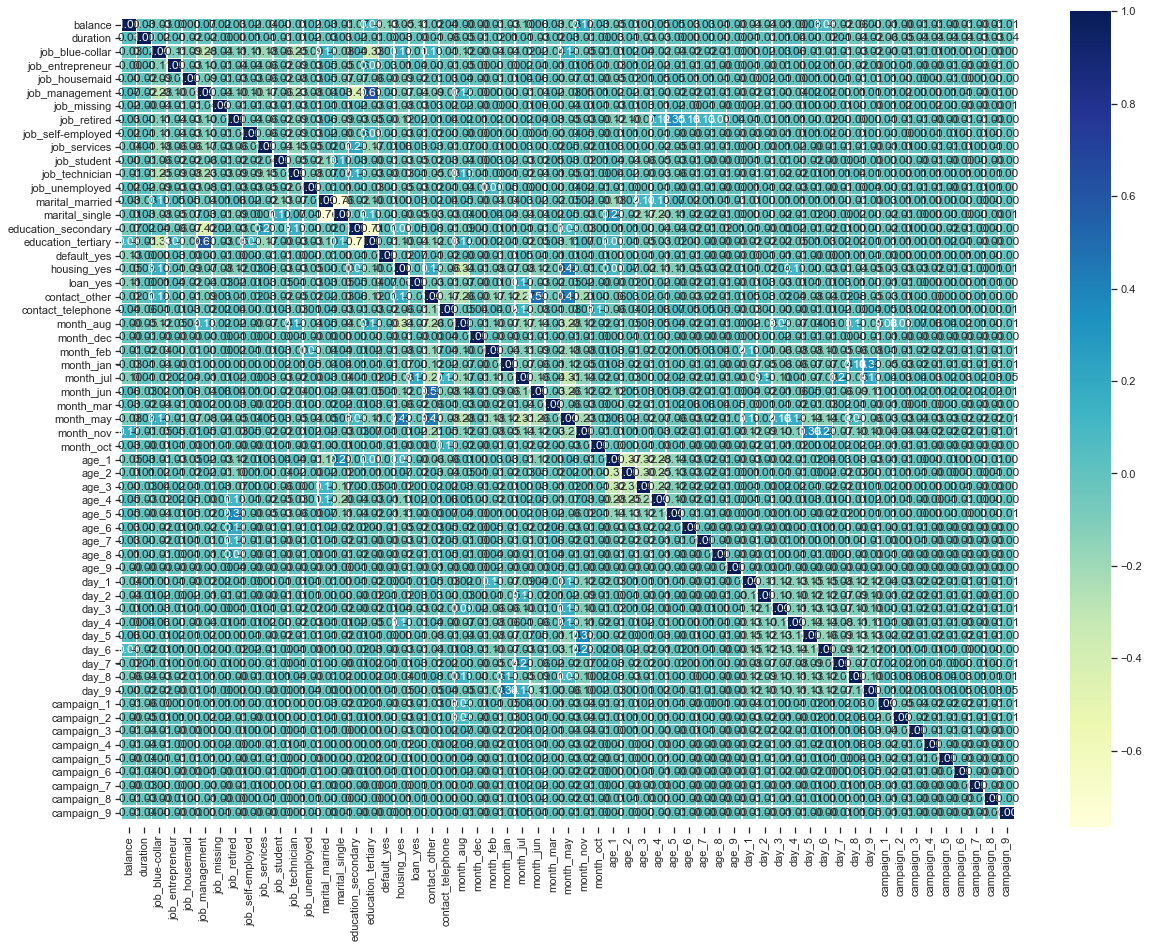

In [43]:
feature_selector.get_correlation_matrix()

In [44]:
feature_selector.get_corr_features_len()

0

In [45]:
feature_selector.get_constant_features_len()

0

We sort the importance of variables for Random Forest. We subtract variables below 0.5 threshold from the train and test data.

In [46]:
feature_selector.get_duplicated_feat_len()

0
10
20
30
40
50


0

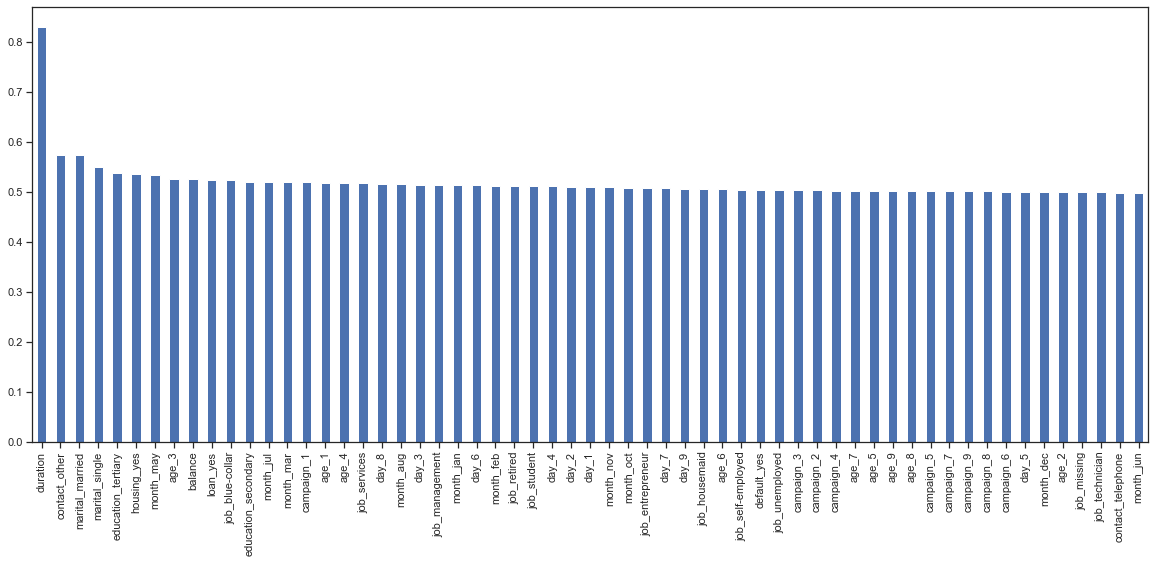

In [47]:
roc_values = feature_selector.get_roc_values()

In [48]:
len(roc_values[roc_values > 0.5])

52

In [49]:
drop_list = roc_values[roc_values < 0.5].index

In [50]:
X_train.drop(drop_list,axis = 1,inplace = True)
X_test.drop(drop_list,axis = 1,inplace = True) 

In [51]:
X_train.shape,X_test.shape

((32000, 52), (8000, 52))

# <a id='4'>4. Model Building</a>

## <a id='4'>4.1. Feature Scaling</a>

Since there will be more than one model below and the operations will take too long, we scale the data.

In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## <a id='4'>4.2. Baseline Model,Model Visualization</a>

In [53]:
#logistic
logistic =  LogisticRegression(random_state = 0)
logistic.fit(X_train, y_train)

#knn
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

#svm
svm = SVC(kernel = 'linear', random_state = 0,probability = True)
svm.fit(X_train, y_train)

#dtree
dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree.fit(X_train, y_train)

#rf
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

#xgboost
xgc = XGBClassifier()
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
modellist = [logistic,knn,svm,dtree,rf,xgc]
for model in modellist:
    print(model.score(X_train,y_train))

0.93075
0.9405
0.92828125
0.9998125
0.99978125
0.96371875


## <a id='4'>4.3. Confusion matrices for models</a>

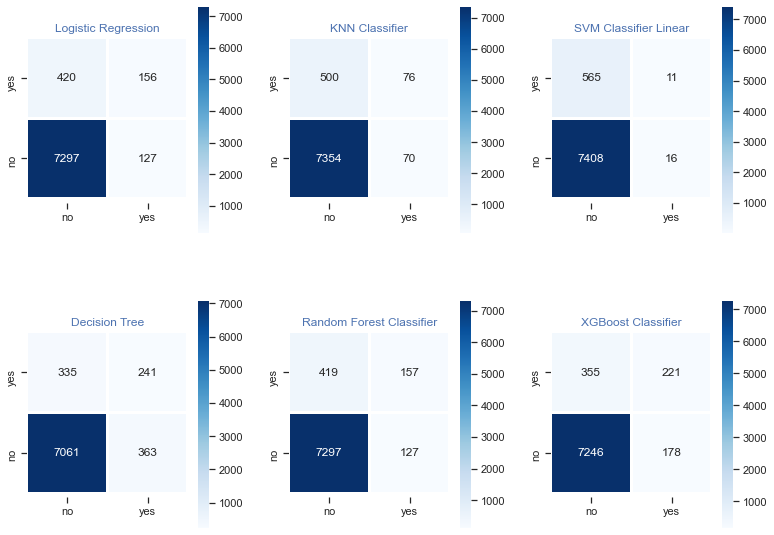

In [55]:
modellist = [logistic,knn,svm,dtree,rf,xgc]
length = len(modellist)
mods   = ['Logistic Regression','KNN Classifier','SVM Classifier Linear',
          'Decision Tree','Random Forest Classifier','XGBoost Classifier']

fig = plt.figure(figsize=(13,15))
plt.rcParams['figure.facecolor'] = 'white'
for i,j,k in itertools.zip_longest(modellist,range(length),mods) :
    plt.subplot(3,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(y_test,predictions)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["no","yes"],
                yticklabels=["no","yes"],
                linewidths = 2,linecolor = "w",cmap = plt.cm.Blues)
    plt.ylim(-0.05, 2)
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

## <a id='4'>4.4. Classification reports for models, Compare model metrics</a>

In [56]:
for i,k in zip(modellist,mods):
    predictions = i.predict(X_test)
    print("{}".format(k))
    print(classification_report(y_test,predictions))

Logistic Regression
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7424
           1       0.55      0.27      0.36       576

    accuracy                           0.93      8000
   macro avg       0.75      0.63      0.66      8000
weighted avg       0.92      0.93      0.92      8000

KNN Classifier
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7424
           1       0.52      0.13      0.21       576

    accuracy                           0.93      8000
   macro avg       0.73      0.56      0.59      8000
weighted avg       0.91      0.93      0.91      8000

SVM Classifier Linear
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7424
           1       0.41      0.02      0.04       576

    accuracy                           0.93      8000
   macro avg       0.67      0.51      0.50      8000
weighted avg     

# <a id='5'>5. Model Performance</a>

## <a id='5'>5.1. Model performance metrics,Tuning parameters</a>

Since our Random Forest Classifier model has high success results, we chose to continue with it. Now we can set the parameters for our last model and continue with the tuning process.

In [57]:
clf = RandomForestClassifier()

In [58]:
param_grid = { 
    'n_estimators': [100,300,500,800,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10,15,20],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'min_samples_leaf' : [1, 2, 5, 10]
}

We prefer to use RandomizedSearchCV, which is faster because GridSearchCV takes much longer. Since we can use this feature 5 times with the cv option in RandomizedSearchCV, we prefer not to use k-fold cross validation.

In [59]:
CV_Random_clf = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, cv= 5,
                                   verbose=2, random_state=42, n_jobs = -1)

## <a id='5'>5.2. ROC - Curves  for model,Randomized Search-Cross Validation</a>

In [60]:
CV_Random_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8, 10, 15,
                                                      20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [61]:
CV_Random_clf.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'entropy'}

In [62]:
rfc=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 300, max_depth=15, criterion='entropy',
                          min_samples_split = 2, min_samples_leaf = 2)

In [63]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_leaf=2, n_estimators=300, random_state=42)

In [64]:
rfc.score(X_train,y_train)

0.9325625

In [65]:
y_pred=rfc.predict(X_test)

In [66]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,y_pred))

Accuracy for Random Forest on CV data:  0.928375


AUROC = 0.937


Text(0.5, 1.0, 'ROC_Curve')

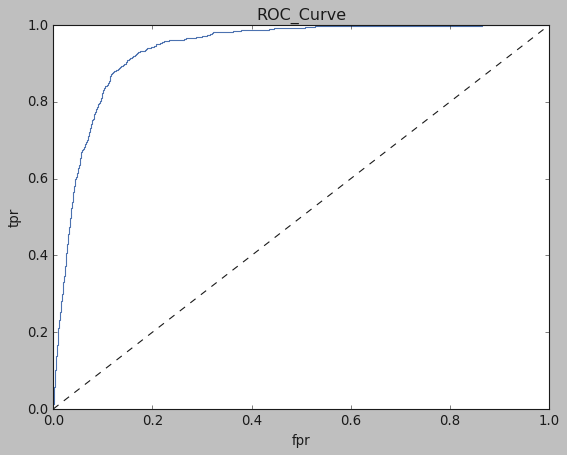

In [67]:
y_pred_proba = rfc.predict_proba(X_test)
y_pred_proba_y = y_pred_proba[:,1]
AUROC = roc_auc_score(y_test,y_pred_proba_y)

label = "AUROC = " + str(np.around(roc_auc_score(y_test,y_pred_proba_y),3))
print(label)
plt.style.use('classic')
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_y)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle = "--",color = "k")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC_Curve")

We reached 93 percent accuracy as a result of the model.

# <a id='6'>6. Segmentation (Bonus)</a>

We will use the KMeans function in the scikit-learn library to create a customer segment for customers who are more likely to purchase the investment product. For the variables, in the above steps, we reach the segments by taking the first 7 variables from the materiality level according to the Random Forest model and including the y variables.

In [93]:
df.head()

,age,balance,day,duration,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_missing,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_other,contact_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,2143.0,5,261.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,44,29.0,5,151.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,33,2.0,5,76.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
3,47,1506.0,5,92.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4,33,1.0,5,198.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [94]:
df_clus =df.copy()

In [95]:
most_important = roc_values.sort_values(ascending = False)

In [96]:
most_important.index[0:7]


Index(['duration', 'contact_other', 'marital_married', 'marital_single',
       'education_tertiary', 'housing_yes', 'month_may'],
      dtype='object')

In [97]:
df_clus = df_clus[most_important.index[0:7]]

In [98]:
df_clus['y'] = df['y']

In [99]:
df_clus['age'] = df['age']

In [100]:
inertia = []
for n in range(1 , 11):
    model = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    model.fit(df_clus)
    inertia.append(model.inertia_)

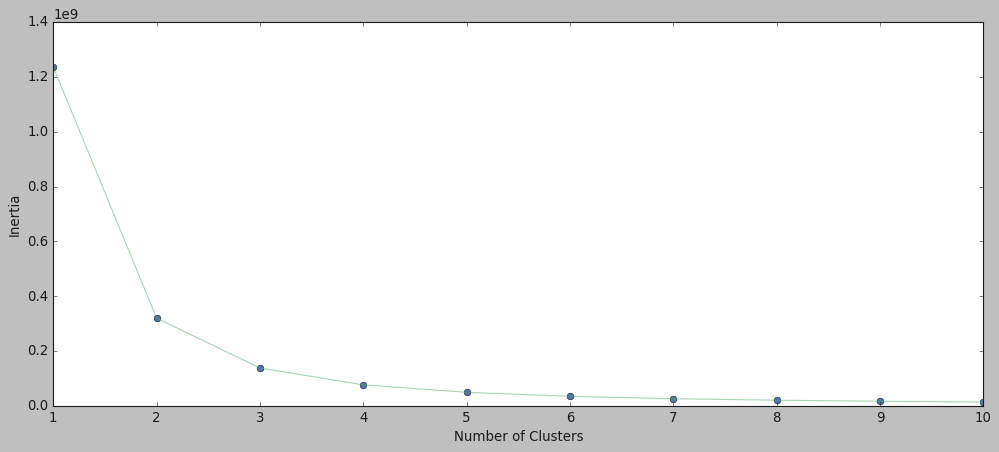

In [101]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [102]:
model = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
model.fit(df_clus)
labels2 = model.labels_

In [103]:
labels2

array([0, 0, 2, ..., 0, 3, 2])

In [104]:
df_clus['label'] = labels2

In [105]:
df_clus.head()

,duration,contact_other,marital_married,marital_single,education_tertiary,housing_yes,month_may,y,age,label
0,261.0,1,1,0,1,1,1,0,58,0
1,151.0,1,0,1,0,1,1,0,44,0
2,76.0,1,1,0,0,1,1,0,33,2
3,92.0,1,1,0,0,1,1,0,47,2
4,198.0,1,0,1,0,0,1,0,33,0


In [106]:
investment_selling = df_clus.groupby(['label','y']).size().reset_index(name='count')

In [107]:
investment_selling

,label,y,count
0,0,0,12053
1,0,1,398
2,1,0,3133
3,1,1,1870
4,2,0,16109
5,2,1,163
6,3,0,5809
7,3,1,465


In [108]:
y_0 = investment_selling.loc[investment_selling['y'] == 0,'count'].reset_index().drop('index',axis = 1)

In [109]:
y_1 = investment_selling.loc[investment_selling['y'] == 1,'count'].reset_index().drop('index',axis = 1)

In [110]:
y_labels = pd.concat([y_0,y_1],axis = 1)

In [111]:
y_labels.columns = ['count_y0','count_y1']

In [112]:
y_labels

,count_y0,count_y1
0,12053,398
1,3133,1870
2,16109,163
3,5809,465


In the results we have reached, we will reach the percentages for those coming from 1 and 0 for y0 and y1.

In [113]:
y_labels['most_selling'] = y_labels['count_y1']/(y_labels['count_y0']+y_labels['count_y1'])

In [114]:
y_labels['segment'] = ['segment_1','segment_2','segment_3','segment_4']

In [115]:
y_labels = y_labels[['segment','count_y0','count_y1','most_selling']]

In [116]:
y_labels

,segment,count_y0,count_y1,most_selling
0,segment_1,12053,398,0.031965
1,segment_2,3133,1870,0.373776
2,segment_3,16109,163,0.010017
3,segment_4,5809,465,0.074115


In [117]:
y_labels['segment'] = ['middlesegment','bestsegment','worsesegment','middlesegment']

In [118]:
y_labels

,segment,count_y0,count_y1,most_selling
0,middlesegment,12053,398,0.031965
1,bestsegment,3133,1870,0.373776
2,worsesegment,16109,163,0.010017
3,middlesegment,5809,465,0.074115


In the segmentation, we see that the representation ratio of the 2nd group reached the highest rate.

# <a id='7'>7. Summary and Conclusion</a>

* It was observed that people who were specified as 'yes' in the default variable did not have a term deposit status or when the Loan variable was examined, those who were specified as 'yes' did not buy term deposits. 
* In these variables, the purchasing rate of the people indicated as 'no' is higher. There may be more focus for these people in future marketing strategies. 
* When we examine the product sales channels, it is concluded that talking by phone is not effective, those made with other options are relatively higher than the phone, and the calls made with cellular are more effective in selling the product.It has been observed that product sales increased mostly in May and in the last days of the months. It is observed that product sales in the winter season decrease on customer basis.
* It has been observed that people with secondary education profiles prefer more in purchasing products. As the most preferred group to buy in the age group is between the ages of 20-30, this situation shows more in the student group in the Job portfolio.
* It has been observed that those who are determined as 'yes' for the housing variable can buy the product relatively easily, while those who are above average for the balance variable prefer to buy more.
* When the 4 segments created by applying KMeans are examined, when we compare the percentages of whether the customers in these segments buy the product or not, it is observed that the segment with the label "1", also known as the "best segment", has the biggest share in purchasing the product.